In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classes import * 
from copy import copy
import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
LT295ch3 = Mapping('LT295chip3_master.txt')
LT361ch4 = Mapping('LT361w2chip4_master.txt')
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
LT361ch7 = Mapping('LT361w2chip7_master.txt')
LT361ch9 = Mapping('LT361w2chip9_master.txt')
chips = [LT295ch3, LT361ch4, LT361ch4_trimmed, LT361ch7, LT361ch9]

LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
nibbles_all = np.absolute(LT361ch4.Lf-LT361ch4_trimmed.Lf)
nibbles80 = (nibbles_all > 0) & (nibbles_all < 0.1)
nibbles = nibbles_all > 0.1
control = nibbles_all < 0.01
print(np.sum(control+nibbles80+nibbles))

395


1.0343901019748334

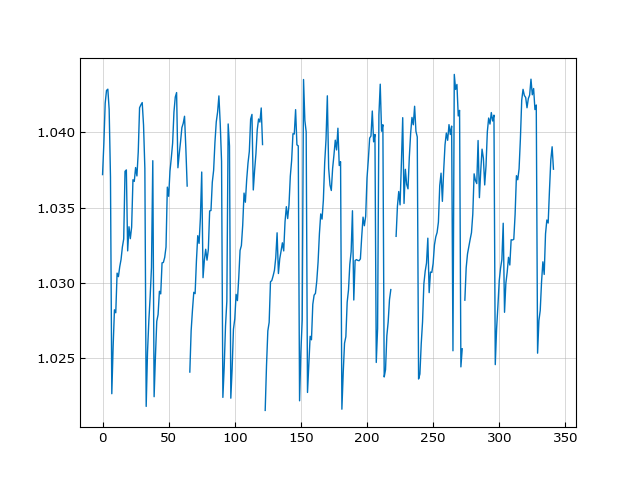

In [3]:
fig, ax = plt.subplots()
chip = LT361ch4
map = chip.map
fm = chip.fm
fd = chip.fd
ax.plot(fm[map][1:-1, :-1].flatten() / fd[map][1:-1, :-1].flatten())
np.nanmean(fm[map][1:-1, :-1].flatten() / fd[map][1:-1, :-1].flatten())

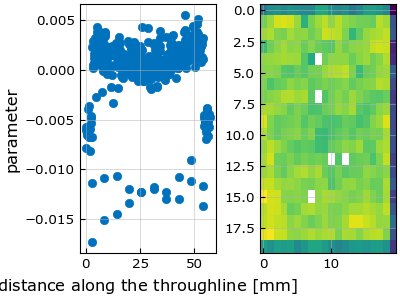

In [4]:
chip = LT361ch4
M = chip.M
N = chip.N
pp = 150   # pixel pitch
kid_id_board = chip.map
df_f = chip.df_f_fit   

fig, axes = plt.subplot_mosaic('ab', figsize=(4,3), constrained_layout=True)
d = np.arange(0, M*pp, pp)
dmap = np.zeros((M,N))
times = 0
for i, row in enumerate(dmap):
    if i == 0:
        row += d
    if i != 0:
        if i % 2 == 0:
            row += dmap[i-1, 0] + d
        else:
            row += dmap[i-1, -1] + d[::-1]
dmap
ax = axes['a']
ax.scatter(dmap.flatten()*1e-3, df_f[kid_id_board].flatten()) # Just replace df_f with an array of Qs
ax.set_xlabel('distance along the throughline [$mm$]')
ax.set_ylabel('parameter')
ax = axes['b']
ax.imshow(df_f[kid_id_board], cmap='viridis', aspect='auto')


In [3]:
def s21(w, w0, Qc, Qi, xa=0):
    Q = Qc*Qi / (Qc + Qi)
    dw = w-w0
    return (Q/Qi + 2j*Q*(dw/w0 + xa)) / (1 + 2j*Q*dw/w0)

def multiplex(w, w0, Qc, Qi, phi=0):
    s = s21(w, w0.T, Qc, Qi, xa=phi)
    s_dB = 20*np.log10(np.abs(s))
    s_dB = np.sum(s_dB, axis=1)
    return s_dB

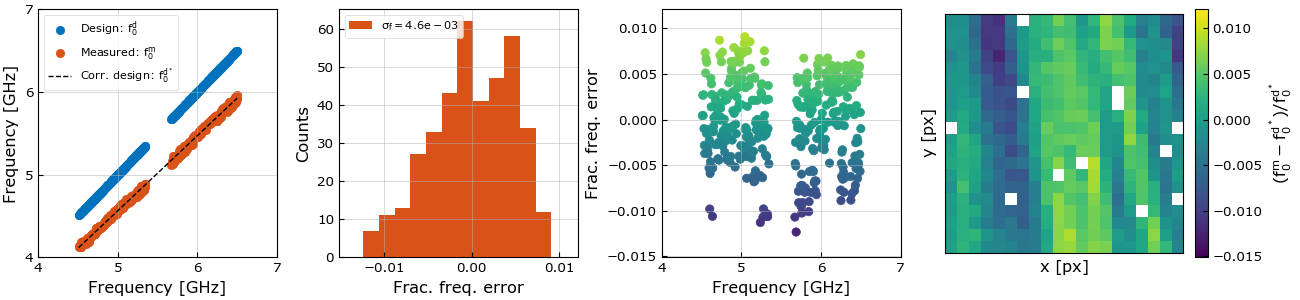

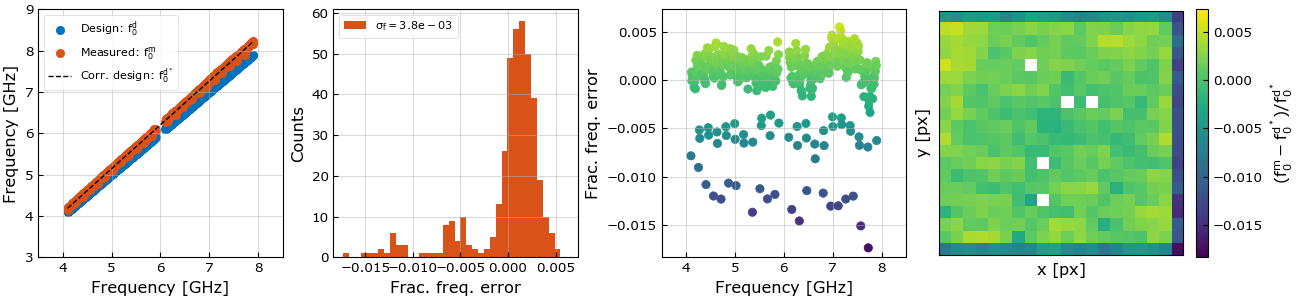

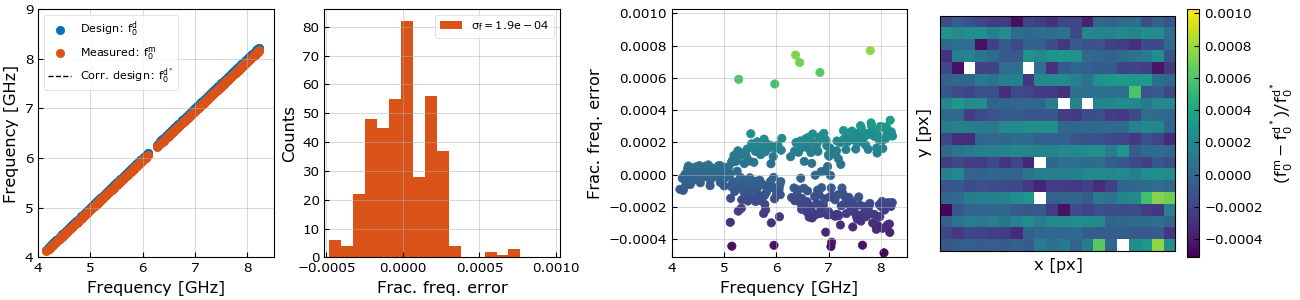

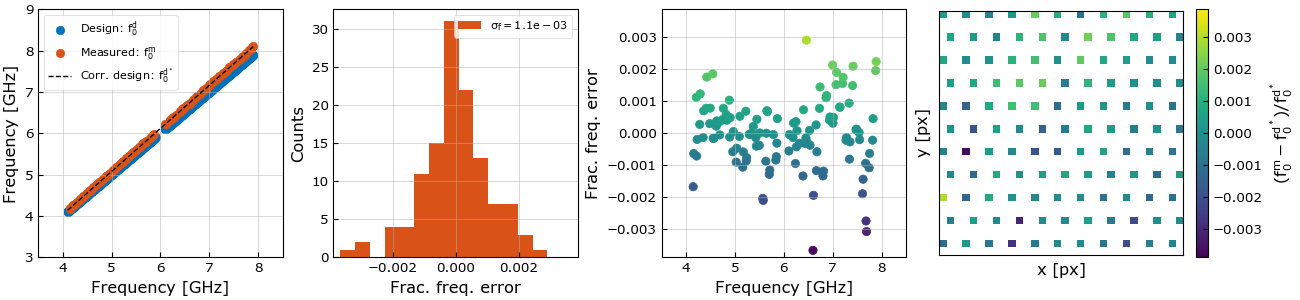

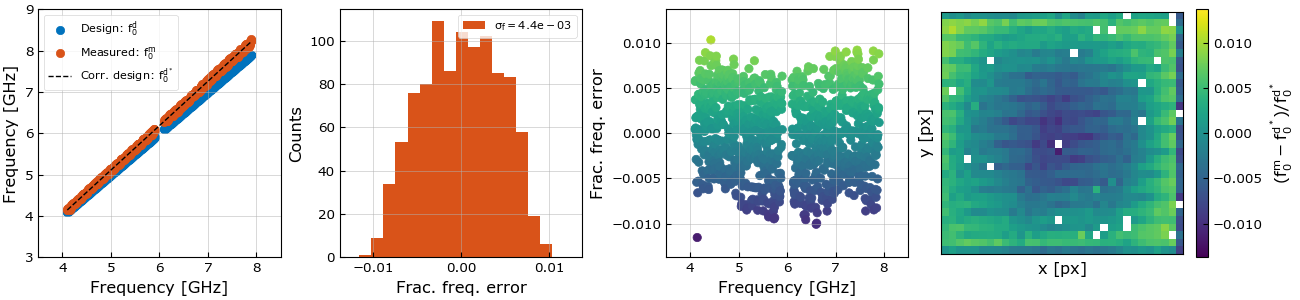

In [5]:
for chip in chips:
    chip.plot()

In [ ]:
fig, axes = plt.subplot_mosaic('aa;bc', constrained_layout=True, figsize=(5,4))
alpha=.75
bins = np.linspace(-20, 10, 30)
ax = axes['a']
ax.hist(LT295ch3.df_f_fit*1e3, bins=bins, label='Optical', facecolor='b', alpha=1)
df_f = LT361ch4.df_f_fit[LT361ch4.map][1:-1, :-1].flatten()
df_f = LT361ch4.df_f_fit
bins = np.linspace(-20, 10, 60)
# ax.hist(df_f*1e3, bins=bins, label='Ebeam' % (np.nanstd(df_f)*1e3), facecolor='o', alpha=.9)

# nibbles_all = np.absolute(LT361ch4.Lf-LT361ch4_trimmed.Lf)
# nibbles80 = (nibbles_all > 0) & (nibbles_all < 0.1)
# nibbles = nibbles_all > 0.1
# ax.hist(LT361ch4_trimmed.df_f_fit[nibbles]*1e3, bins=5, label='Trimming' % (np.nanstd(LT361ch4_trimmed.df_f_fit[nibbles])*1e3), facecolor='y', alpha=1)
ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')
ax.set_ylabel('Counts')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)
# ax.annotate('$\sigma=%.1f \\times 10^{-3}$' % (LT295ch3.std_fit*1e3), (-15,40), c='b', fontsize=12)
# ax.annotate('$\sigma=%.1f \\times 10^{-3}$' % (np.nanstd(df_f)*1e3), (-15, 35), c='o', fontsize=12)
# ax.annotate('$\sigma=%.1f\u2030$' % (np.nanstd(LT361ch4_trimmed.df_f_fit[nibbles])*1e3), (7, 50), c='y', fontsize=14)
# plt.savefig('Scatter_histogram.svg')
ax.set_xlim([bins[0], bins[-1]])
ax.set_ylim((0,50))
ax = axes['b']
im = ax.imshow(LT295ch3.df_f_fit[LT295ch3.map]*1e3, origin='lower', vmin=-20, vmax=10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, chip.N-.5)
ax.set_ylim(-.5, chip.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('b')
    spine.set_linewidth(2)
ax = axes['c']
im = ax.imshow(LT361ch4.df_f_fit[LT361ch4.map]*1e3, origin='lower', vmin=-20, vmax=10)
cbar = fig.colorbar(im, ax=axes['c'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, chip.N-.5)
ax.set_ylim(-.5, chip.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('o')
    spine.set_linewidth(2)

# plt.savefig('scatter hists opt.svg')

In [ ]:
fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(5,4))
alpha=.75
bins = np.linspace(-20, 10, 30)
ax = axes['a']
ax.hist(LT295ch3.df_f_fit*1e3, bins=bins, label='Optical', facecolor='b', alpha=1)
bins = np.linspace(-20, 10, 60)
ax.hist(LT361ch4.df_f_fit*1e3, bins=bins, facecolor='o', alpha=.9)
bins = np.linspace(-20, 10, 40)
ax.hist(LT361ch7.df_f_fit*1e3, bins=bins, facecolor='p', alpha=.9)
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
nibbles_all = np.absolute(LT361ch4.Lf-LT361ch4_trimmed.Lf)
nibbles80 = (nibbles_all > 0) & (nibbles_all < 0.1)
nibbles = nibbles_all > 0.1
bins = np.linspace(-20, 10, 100)
ax.hist(LT361ch4_trimmed.df_f_fit*1e3, bins=bins, label='Trimming' % (LT361ch4_trimmed.std_fit*1e3), facecolor='g', alpha=.9)
print(LT361ch4_trimmed.std_fit*1e3)
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
LT361ch4_trimmed.remap(~nibbles)
ax.hist(LT361ch4_trimmed.df_f_fit*1e3, bins=bins, label='Trimming' % (LT361ch4_trimmed.std_fit*1e3), facecolor='y', alpha=.9)
print(LT361ch4_trimmed.std_fit*1e3)
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
LT361ch4_trimmed.remap(~nibbles80)
ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')
ax.set_ylabel('Counts')
ax.set_xlim([bins[0], bins[-1]])
# ax.set_ylim((0,80))
# plt.savefig('scatter hists opt ebpg sparse trim.svg')

0.031301631971313755
0.1794055963847415
0.15488669461524418
0.11341790130724341


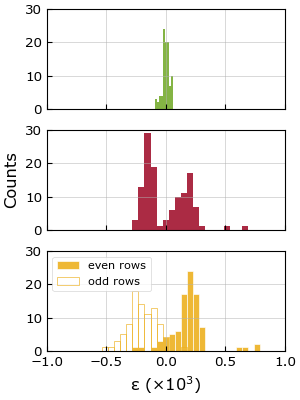

In [28]:
fig, axes = plt.subplot_mosaic('a;b;c', constrained_layout=True, figsize=(3,4), sharex=True, sharey=True)
alpha=.75
bins = np.linspace(-20, 10, 30)
ax = axes['a']
# ax.hist(LT295ch3.df_f_fit*1e3, bins=bins, label='Optical', facecolor='b', alpha=1)
# bins = np.linspace(-20, 10, 60)
# ax.hist(LT361ch4.df_f_fit*1e3, bins=bins, facecolor='o', alpha=.9)
# bins = np.linspace(-20, 10, 40)
# ax.hist(LT361ch7.df_f_fit*1e3, bins=bins, facecolor='p', alpha=.9)
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
bins = np.linspace(-1,1, 40)
LT361ch4_trimmed.remap(~control)
ax.hist(LT361ch4_trimmed.df_f_fit*1e3, bins=bins/3, label='Trimming' % (LT361ch4_trimmed.std_fit*1e3), facecolor='g', alpha=.9)
print(LT361ch4_trimmed.std_fit*1e3)
ax = axes['b']
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
LT361ch4_trimmed.remap(~nibbles80)
ax.hist(LT361ch4_trimmed.df_f_fit*1e3, bins=bins, label='Trimming' % (LT361ch4_trimmed.std_fit*1e3), facecolor='r', alpha=.9)
print(LT361ch4_trimmed.std_fit*1e3)
# ax = axes['c']
# LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
# LT361ch4_trimmed.remap(~nibbles)
# ax.hist(LT361ch4_trimmed.df_f_fit[::2]*1e3, bins=bins, label='Trimming' % (LT361ch4_trimmed.std_fit*1e3), facecolor='y', alpha=.9)
# print(np.nanstd(LT361ch4_trimmed.df_f_fit[::2]*1e3))
# ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')
ax = axes['c']
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
LT361ch4_trimmed.remap(~nibbles)
ax.hist(LT361ch4_trimmed.df_f_fit[::2]*1e3, bins=bins, label='even rows', facecolor='y', edgecolor='w', alpha=.9)
print(np.nanstd(LT361ch4_trimmed.df_f_fit[::2]*1e3))
ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
LT361ch4_trimmed.remap(~nibbles)
ax.hist(LT361ch4_trimmed.df_f_fit[1::2]*1e3, bins=bins, label='odd rows', facecolor='None', edgecolor='y', alpha=.9)
print(np.nanstd(LT361ch4_trimmed.df_f_fit[1::2]*1e3))
ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')
ax.legend(loc='upper left')
axes['b'].set_ylabel('Counts')
ax.set_xlim([bins[0], bins[-1]])
ax.set_ylim((0,30))
plt.savefig('odd and even rows.svg')

nan
108.45945600421749


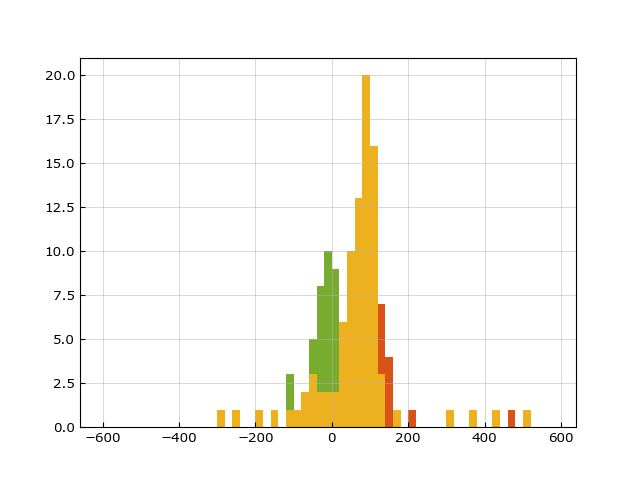

In [16]:
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
new_fingers = LT361ch4_trimmed.Lf
df_f_corr = LT361ch4_trimmed.df_f_fit
design = LT361ch4_trimmed.fd
corr_design = design*(1+np.nanmean(LT361ch4_trimmed.df_f[control]))
meas = LT361ch4_trimmed.fm

nanmask = np.isnan(meas)
nanmask = (nanmask) & (~nibbles)
def poly(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3+d*x**2+e*x+f

popt, pcov = curve_fit(poly, corr_design[~nanmask], new_fingers[~nanmask])
actual_fingers = poly(meas, *popt) - (poly(corr_design, *popt) - new_fingers)

misalign = (new_fingers - actual_fingers)[LT361ch4_trimmed.map]*1e3
misalign[1::2] *= np.nan


fig, ax = plt.subplots()
bins = np.arange(-600, 600, 20)
print(np.mean(misalign[nibbles80[LT361ch4_trimmed.map]]))
_ = ax.hist(misalign[control[LT361ch4_trimmed.map]], bins=bins, facecolor='g')
_ = ax.hist(misalign[nibbles80[LT361ch4_trimmed.map]], bins=bins)
_ = ax.hist(misalign[nibbles[LT361ch4_trimmed.map]], bins=bins, facecolor='y')
print(np.nanstd(misalign[nibbles[LT361ch4_trimmed.map]]))

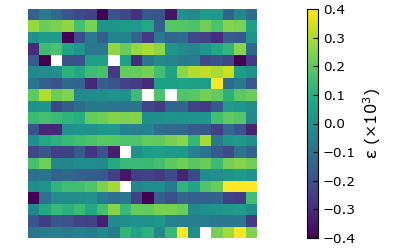

In [8]:
LT361ch4_trimmed = TrimmedMapping('LT361w2chip4_master.txt')
# LT361ch4_trimmed.remap((~nibbles) & (~nibbles80))

fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,2.5))
ax =axes['a']
im = ax.imshow(LT361ch4_trimmed.df_f_fit[LT361ch4_trimmed.map]*1e3, origin='lower', vmin=-.4, vmax=.4)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch4_trimmed.N-.5)
ax.set_ylim(-.5, LT361ch4_trimmed.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
plt.savefig('misalignment.svg')

In [ ]:
fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,3))
ax =axes['a']
im = ax.imshow(LT361ch7.df_f_fit[LT361ch7.map]*1e3, origin='lower', vmin=-20, vmax=10)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch7.N-.5)
ax.set_ylim(-.5, LT361ch7.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
# plt.savefig('chip7.svg')

In [ ]:
fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,3))
ax =axes['a']
im = ax.imshow(LT361ch4.df_f_fit[LT361ch4.map]*1e3, origin='lower', vmin=-20, vmax=10)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch4.N-.5)
ax.set_ylim(-.5, LT361ch4.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
# plt.savefig('chip4.svg')

In [ ]:
LT361ch4 = Mapping('LT361w2chip4_master.txt')

fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,3))
ax =axes['a']
im = ax.imshow(LT361ch4.df_f_fit[LT361ch4.map]*1e3, origin='lower', vmin=-20, vmax=10)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch4.N-.5)
ax.set_ylim(-.5, LT361ch4.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
# plt.savefig('chip4.svg')

In [ ]:
LT361ch4 = Mapping('LT361w2chip4_master.txt')

ids = np.hstack((LT361ch4.map[:, :-1]))
# ids = np.hstack((map[1:-1].flatten(), map[0, -1], map[-1, -1]))
# LT361ch4.remap(ids)
fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,3))
ax =axes['a']
im = ax.imshow(LT361ch4.df_f_fit[LT361ch4.map]*1e3, origin='lower', vmin=-15, vmax=-10)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch4.N-.5)
ax.set_ylim(-.5, LT361ch4.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
# plt.savefig('chip4_leftedge.svg')

In [ ]:
LT361ch4 = Mapping('LT361w2chip4_master.txt')
ids = np.hstack((LT361ch4.map[1:-1, :]))
# ids = np.hstack((map[1:-1].flatten(), map[0, -1], map[-1, -1]))
LT361ch4.remap(ids)
fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,3))
ax =axes['a']
im = ax.imshow(LT361ch4.df_f_fit[LT361ch4.map]*1e3, origin='lower', vmin=-1, vmax=1)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch4.N-.5)
ax.set_ylim(-.5, LT361ch4.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
plt.savefig('chip4_topbottom.svg')

In [ ]:
LT361ch4 = Mapping('LT361w2chip4_master.txt')
ids = np.hstack((LT361ch4.map[0, :], LT361ch4.map[-1, :], LT361ch4.map[:, -1]))
# ids = np.hstack((map[1:-1].flatten(), map[0, -1], map[-1, -1]))
LT361ch4.remap(ids)
fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(4,3))
ax =axes['a']
im = ax.imshow(LT361ch4.df_f_fit[LT361ch4.map]*1e3, origin='lower', vmin=-2, vmax=2)
cbar = fig.colorbar(im, ax=axes['a'], orientation='vertical', pad=0.2)
_ = cbar.ax.set_ylabel('$\epsilon$ ($\\times 10^3$)')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-.5, LT361ch4.N-.5)
ax.set_ylim(-.5, LT361ch4.M-.5)
ax.grid(False, which='both')
for spine in ax.spines.values():
    spine.set_edgecolor('None')
    spine.set_linewidth(2)
print(LT361ch4.std_fit)
# plt.savefig('chip4_topbottom.svg')

In [ ]:
axlabels = 'ab'
fig, axes = plt.subplot_mosaic('a;b', constrained_layout=True, figsize=(2,5))
chips = [LT295ch3, LT361ch4]
for i, chip in enumerate(chips):
    ax = axes[axlabels[i]]
    im = ax.imshow(chip.df_f_fit[chip.map]*1e3, origin='lower', vmin=-10, vmax=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(-.5, chip.N-.5)
    ax.set_ylim(-.5, chip.M-.5)
    ax.grid(False, which='both')
    # ax.set_xlabel('$x$ $[px]$')
    # ax.set_ylabel('$y$ $[px]$')
cbar = fig.colorbar(im, ax=axes['b'], orientation='horizontal', pad=0.2)
_ = cbar.ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')
# plt.savefig('scatter spatial opt ebpg.png')


In [ ]:
map = LT361ch4.map
# ids = np.hstack((map[0],map[-1], map[:, -1]))
ids = np.hstack((map[:, :-1]))
# ids = np.hstack((map[1:-1].flatten(), map[0, -1], map[-1, -1]))
LT361ch4_center = copy(LT361ch4)
LT361ch4.remap(ids)
LT361ch4.plot()
LT361ch4.remap([])
LT361ch4.plot()

# fig, axes = plt.subplot_mosaic('a', constrained_layout=True, figsize=(3,3))
# ax = axes['a']
# scatter = chip.df_f_fit[chip.map]*1e3
# scatter[0] = np.nan
# scatter[-1] = np.nan
# scatter[:, -1] = np.nan
# im = ax.imshow(scatter, origin='lower', vmin=-5, vmax=5)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_xlim(-.5, chip.N-.5)
# ax.set_ylim(-.5, chip.M-.5)
# ax.grid(False, which='both')
# ax.set_xlabel('$x$ $[px]$')
# ax.set_ylabel('$y$ $[px]$')
# cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2)
# _ = cbar.ax.set_xlabel('$\epsilon$ ($\\times 10^3$)')

In [59]:
chip4 = np.load('LT361w2ch4_dark.npy')
chip4f = np.load('LT361w2ch4_dark_freqs.npy')
chip4nibblef, chip4nibble = np.load('LT361w2ch4_nibble_dark.npy')
f = np.linspace(5.2,5.4, 100000).reshape((-1,1))
design = multiplex(f, LT361ch4.fd.reshape((-1,1)), 50e3, 5e5)
design_nibble = multiplex(f, LT361ch4_trimmed.fd[~np.isnan(LT361ch4_trimmed.fd)].reshape((-1,1)), 50e3, 3e5)
mean_shift = np.nanmean(LT361ch4_trimmed.fm[0:80]/LT361ch4.fm[0:80])

In [ ]:
fig, ax = plt.subplot_mosaic('a', constrained_layout=True, figsize=(6,2.5), sharex=False, sharey=True)
ax['a'].plot(chip4f, chip4, 'k', label='design', lw=.5)
ax['a'].set_xlabel('Frequency (GHz)', fontsize=12)
ax['a'].set_ylabel('$|S_{21}|^2$ (dB)')
ax['a'].set_xlim([4.2, 8.2])
# ax['a'].set_ylim([-25, 5])
# ax['a'].set_xticks(np.arange(5.2, 5.4, 0.05))
# ax['a'].set_yticks(np.arange(-25, 10,10))
plt.savefig('VNA_chip4.svg')

In [ ]:
fig, ax = plt.subplot_mosaic('a;b', constrained_layout=True, figsize=(6,2.5), sharex=False, sharey=True)
ax['a'].plot(f, design, 'k', label='design')
# ax['a'].set_xlabel('Frequency (GHz)', fontsize=12)
ax['a'].set_ylabel('$|S_{21}|^2$ (dB)')
ax['a'].set_xlim([5.2, 5.4])
ax['a'].set_ylim([-25, 5])
ax['a'].set_xticks(np.arange(5.2, 5.4, 0.05))
ax['a'].set_yticks(np.arange(-25, 10,10))
ax['b'].plot(chip4f, chip4, 'o', label='measured')
# ax['c'].plot(f, design_nibble, 'k', label='redesign')
# ax['d'].plot(chip4nibblef/mean_shift, chip4nibble-20, 'y', label='trimmed ($\u2030$)')
# ax['d'].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=True)
ax['b'].set_xlim([5.2, 5.4])
ax['b'].set_ylim([-25, 5])
ax['b'].set_xticks(np.arange(5.2, 5.4, 0.05))
ax['b'].set_yticks(np.arange(-25, 10,10))
# _ = ax.set_xticklabels(np.linspace(5.2, 5.6, 5))
# _ = ax.set_yticklabels([])
ax['b'].set_xlabel('Frequency (GHz)', fontsize=12)
ax['b'].set_ylabel('$|S_{21}|^2$ (dB)')
# fig.text(0, 0.6, '$|S_{21}|^2$ (dB)', va='center', rotation='vertical', fontsize=12)
plt.savefig('VNA_problem.svg')


In [ ]:
fig, ax = plt.subplot_mosaic('a;b;c;d', constrained_layout=True, figsize=(6,5), sharex=True, sharey=True)
ax['a'].plot(f, design, 'k', label='design')
ax['b'].plot(chip4f, chip4, 'o', label='measured')
ax['c'].plot(f, design_nibble, 'k', label='redesign')
ax['d'].plot(chip4nibblef/mean_shift, chip4nibble-20, 'y', label='trimmed ($\u2030$)')
# ax['d'].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=True)
ax['d'].set_xlim([5.2, 5.4])
ax['d'].set_ylim([-25, 5])
ax['d'].set_xticks(np.arange(5.2, 5.4, 0.05))
ax['d'].set_yticks(np.arange(-25, 10,10))
# _ = ax.set_xticklabels(np.linspace(5.2, 5.6, 5))
# _ = ax.set_yticklabels([])
ax['d'].set_xlabel('Frequency (GHz)', fontsize=14)
ax['d'].set_ylabel(' ')
fig.text(0, 0.5, 'Transmission (dBm)', va='center', rotation='vertical', fontsize=14)
plt.savefig('VNA_comparison.svg')



In [ ]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,2))
# ax.axvline(1e-2)
ax.set_xlim([1e-6, 1e0])
ax.set_xscale('log')
ax.set_yticks([])
ax.set_yticklabels([])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')